# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re

In [2]:
sns.set_style('whitegrid')

# Importing and exploring datasets

In [64]:
#Train set obtained with the scraper
train = pd.read_csv('trainX.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 41 columns):
Player           358 non-null object
Scrim yds        358 non-null float64
TOT TD           358 non-null float64
Fmbl             358 non-null float64
Rec              358 non-null float64
Tgt              358 non-null float64
Att              358 non-null float64
Age              358 non-null float64
Rush yds         358 non-null float64
Rec yds          358 non-null float64
Yds/rec          358 non-null float64
Rec TD           358 non-null float64
Rec 1D           358 non-null float64
Catch %          358 non-null float64
Rushing TD       358 non-null float64
Rush 1D          358 non-null float64
Rush long        358 non-null float64
Rec long         358 non-null float64
Yards/att        358 non-null float64
Touch            358 non-null float64
Yards/touch      358 non-null float64
Scrim yds.1      0 non-null float64
TOT TD.1         0 non-null float64
Fmbl.1           0 non-nul

In [5]:
train.dropna(axis=1, inplace=True)

In [6]:
train.head()

,Player,Scrim yds,TOT TD,Fmbl,Rec,Tgt,Att,Age,Rush yds,Rec yds,...,Rec TD,Rec 1D,Catch %,Rushing TD,Rush 1D,Rush long,Rec long,Yards/att,Touch,Yards/touch
0,Christian McCaffrey +,95.34375,0.6250,0.1875,5.84375,7.40625,10.50000,21.5,47.90625,47.43750,...,0.34375,2.43750,78.55,0.28125,2.34375,49.5,37.5,4.35,16.34375,5.75
1,Ezekiel Elliott,130.12000,0.7200,0.2800,4.12000,5.32000,21.84000,22.5,96.68000,33.44000,...,0.20000,1.20000,74.75,0.52000,5.64000,35.5,55.0,4.40,25.96000,5.00
2,Nick Chubb,71.56250,0.6250,0.0000,1.25000,1.81250,12.00000,23.0,62.25000,9.31250,...,0.12500,0.31250,69.00,0.50000,2.93750,92.0,24.0,5.20,13.25000,5.40
3,Derrick Henry,63.68750,0.5625,0.0625,0.81250,1.09375,12.21875,23.5,56.34375,7.34375,...,0.03125,0.25000,74.00,0.53125,2.84375,87.0,43.5,4.55,13.03125,4.85
4,Michael Thomas+,82.81250,0.4375,0.0625,7.15625,9.25000,0.00000,24.5,0.00000,82.81250,...,0.43750,4.78125,77.40,0.00000,0.00000,0.0,57.5,0.00,7.15625,11.60


In [7]:
train.describe()

,Scrim yds,TOT TD,Fmbl,Rec,Tgt,Att,Age,Rush yds,Rec yds,Yds/rec,Rec TD,Rec 1D,Catch %,Rushing TD,Rush 1D,Rush long,Rec long,Yards/att,Touch,Yards/touch
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,32.919330,0.213971,0.054446,2.025372,3.077662,2.244466,24.952514,9.775795,23.143535,9.864106,0.149273,1.134336,61.997207,0.064698,0.506039,11.818436,32.858939,2.303771,4.269838,9.047765
std,27.981738,0.208171,0.078792,1.662357,2.504845,4.531513,2.800907,19.818035,21.187638,4.297770,0.161832,1.069108,20.387100,0.148987,1.039894,17.847447,20.222995,2.982337,4.964826,4.510904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-4.000000,0.000000,0.000000
25%,10.177083,0.062500,0.000000,0.651786,1.055099,0.000000,23.000000,0.000000,6.437500,7.525000,0.000000,0.264444,55.387500,0.000000,0.000000,0.000000,18.125000,0.000000,1.039062,5.200000
50%,27.677778,0.158125,0.031250,1.629167,2.562500,0.062500,24.500000,0.079877,16.380952,10.100000,0.100000,0.833333,65.875000,0.000000,0.000000,1.500000,30.000000,0.000000,2.468750,9.700000
75%,51.464466,0.330645,0.083333,2.925926,4.603205,1.264516,26.500000,5.870536,35.859375,12.800000,0.236264,1.696875,74.200000,0.035714,0.298529,18.000000,46.875000,4.350000,5.093414,12.400000
max,141.851852,1.379310,0.500000,8.111111,11.413793,21.840000,37.500000,96.680000,97.586207,23.000000,0.827586,4.967742,100.000000,1.034483,5.640000,92.000000,97.000000,14.500000,27.481481,23.000000


In [8]:
labels = ['Name','Team','Age','Pos','Games','GS','Tgt','Rec','Rec_Yards','Y/R','RecTD','Rec1D','Lng','R/G','Rec_Y/G','Ctch%','Y/Tgt','Rush','Rush_Yds','Rush_TD','Rush_1D','Rush_Lng','Y/A','Y/G','A/G','Touch','Y/Tch','YScm','RRTD','Fmb_AV']

In [93]:
# Test data obtained with scraper; label names adjusted
test = pd.read_csv('testX.csv', names=labels)

In [10]:
test.head()

,Name,Team,Age,Pos,Games,GS,Tgt,Rec,Rec_Yards,Y/R,...,Rush_1D,Rush_Lng,Y/A,Y/G,A/G,Touch,Y/Tch,YScm,RRTD,Fmb_AV
0,Christian McCaffrey *+,CAR,23,RB,16,16,142,116,1005,8.7,...,57,84.0,4.8,86.7,17.9,403,5.9,2392,19,1
1,Ezekiel Elliott*,DAL,24,RB,16,16,71,54,420,7.8,...,78,33.0,4.5,84.8,18.8,355,5.0,1777,14,3
2,Nick Chubb*,CLE,24,RB,16,16,49,36,278,7.7,...,62,88.0,5.0,93.4,18.6,334,5.3,1772,8,3
3,Derrick Henry *,TEN,25,RB,15,15,24,18,206,11.4,...,73,74.0,5.1,102.7,20.2,321,5.4,1746,18,5
4,Michael Thomas*+,NOR,26,WR,16,15,185,149,1725,11.6,...,0,-9.0,-9.0,-0.6,0.1,150,11.4,1716,9,1


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 30 columns):
Name         556 non-null object
Team         556 non-null object
Age          556 non-null int64
Pos          241 non-null object
Games        556 non-null int64
GS           556 non-null int64
Tgt          556 non-null int64
Rec          556 non-null int64
Rec_Yards    556 non-null int64
Y/R          486 non-null float64
RecTD        556 non-null int64
Rec1D        556 non-null int64
Lng          556 non-null int64
R/G          556 non-null float64
Rec_Y/G      556 non-null float64
Ctch%        556 non-null object
Y/Tgt        490 non-null float64
Rush         317 non-null float64
Rush_Yds     317 non-null float64
Rush_TD      317 non-null float64
Rush_1D      556 non-null int64
Rush_Lng     317 non-null float64
Y/A          316 non-null float64
Y/G          317 non-null float64
A/G          317 non-null float64
Touch        556 non-null int64
Y/Tch        556 non-null float64
YSc

In [12]:
# 2020 roster updated dateset to confirm player data
players = pd.read_excel('players2020.xlsx')

https://www.footballdb.com/players/

In [13]:
players.head()

,Player,Pos,Team,College
0,"Abdullah, Ameer",RB,Minnesota,Nebraska
1,"Adams, Josh",RB,NY Jets,Notre Dame
2,"Ahmed, Salvon",RB,Miami,Washington
3,"Akers, Cam",RB,LA Rams,Florida State
4,"Anderson, Bruce",RB,Indianapolis,North Dakota State


In [14]:
def yoda(text):
    return ' '.join(text.split()[::-1])

In [15]:
players['Player'] = players['Player'].apply(yoda)

In [16]:
players['Player'] = players['Player'].str.replace(r'[^\w\s]', '')

In [17]:
players.head()

,Player,Pos,Team,College
0,Ameer Abdullah,RB,Minnesota,Nebraska
1,Josh Adams,RB,NY Jets,Notre Dame
2,Salvon Ahmed,RB,Miami,Washington
3,Cam Akers,RB,LA Rams,Florida State
4,Bruce Anderson,RB,Indianapolis,North Dakota State


In [65]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 4 columns):
Player     742 non-null object
Pos        742 non-null object
Team       742 non-null object
College    742 non-null object
dtypes: object(4)
memory usage: 23.3+ KB


In [19]:
ppr2019 = pd.read_csv('2019_PPR.csv')

https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2019&start=1&end=17

In [20]:
ppr2019.head(12)

,Rank,Player,Team,Position,Points,Games,Avg
0,1,Christian McCaffrey,CAR,RB,471.2,16,29.5
1,2,Lamar Jackson,BAL,QB,421.7,15,28.1
2,3,Michael Thomas,NO,WR,374.6,16,23.4
3,4,Dak Prescott,DAL,QB,348.9,16,21.8
4,5,Jameis Winston,NO,QB,335.2,16,21.0
5,6,Russell Wilson,SEA,QB,333.5,16,20.8
6,7,Deshaun Watson,HOU,QB,333.0,15,22.2
7,8,Aaron Jones,GB,RB,314.8,16,19.7
8,9,Ezekiel Elliott,DAL,RB,311.7,16,19.5
9,10,Austin Ekeler,LAC,RB,309.0,16,19.3


In [21]:
ppr2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
Rank        803 non-null int64
Player      803 non-null object
Team        803 non-null object
Position    803 non-null object
Points      803 non-null float64
Games       803 non-null int64
Avg         803 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 44.0+ KB


In [22]:
ppr2018 = pd.read_csv('2018_PPR.csv')

https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2018&start=1&end=17

In [23]:
ppr2017 = pd.read_csv('2017_PPR.csv')

https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2017&start=1&end=17

# Cleaning 

In [102]:
test['Name'] = test['Name'].apply(lambda x:x.split('*')[0])

In [103]:
test['Name'] = test['Name'].str.replace("\t","")

In [104]:
test['Name'] = test['Name'].apply(lambda x:x.strip())

In [105]:
#Not the most orthodox but works...
#Getting PPR scores from fantasypros
df = test.merge(ppr2019,how='left', left_on='Name', right_on='Player')
df.drop(['Player','Team_y','Games_y','Position'], axis=1, inplace=True)

In [106]:
df['Name'] = df['Name'].str.replace(r'[^\w\s]', '')

In [100]:
df.head()

,Name,Team_x,Age,Pos,Games_x,GS,Tgt,Rec,Rec_Yards,Y/R,...,Y/G,A/G,Touch,Y/Tch,YScm,RRTD,Fmb_AV,Rank,Points,Avg
0,Christian McCaffrey,CAR,23,RB,16,16,142,116,1005,8.7,...,86.7,17.9,403,5.9,2392,19,1,1.0,471.2,29.5
1,Ezekiel Elliott,DAL,24,RB,16,16,71,54,420,7.8,...,84.8,18.8,355,5.0,1777,14,3,9.0,311.7,19.5
2,Nick Chubb,CLE,24,RB,16,16,49,36,278,7.7,...,93.4,18.6,334,5.3,1772,8,3,30.0,255.2,16.0
3,Derrick Henry,TEN,25,RB,15,15,24,18,206,11.4,...,102.7,20.2,321,5.4,1746,18,5,13.0,294.6,19.6
4,Michael Thomas,NOR,26,WR,16,15,185,149,1725,11.6,...,-0.6,0.1,150,11.4,1716,9,1,3.0,374.6,23.4


In [107]:
df['Pos'].value_counts()

WR     77
TE     42
QB     31
RB     31
wr     17
te     17
rb      9
qb      6
FB      4
fb      3
FS      2
NT      1
RDE     1
LT      1
Name: Pos, dtype: int64

In [108]:
df.drop(df[(df.Pos == 'QB') | (df.Pos == 'qb')].index, inplace=True)

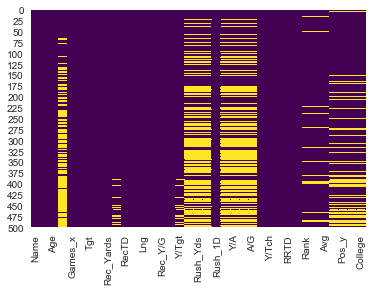

In [126]:
#Monitor null values

sns.heatmap(test.isnull(),cbar=False,cmap='viridis')

In [128]:
#To perform a detailed exploration in Excel --> 5 players require slight name modifications
test.to_excel('players_new.xlsx')

In [110]:
#Editing data for players which are relevant for Fantays purposes and have name discrepancies;
#hence merging is not succesful

df.loc[df['Name']=='Josh Jacobs','Name'] = 'Joshua Jacobs'
df.loc[df['Name']=='Ronald Jones II','Name'] = 'Ronald II Jones'
df.loc[df['Name']=='Odell Beckham Jr','Name'] = 'Odell Jr Beckham'
df.loc[df['Name']=='Ted Ginn Jr','Name'] = 'Ted Jr Ginn'
df.loc[df['Name']=='Benny Snell Jr','Name'] = 'Benjamin Snell'
df.loc[df['Name']=='Irv Smith Jr','Name'] = 'Irv Smith'

In [111]:
#Getting updated player data (Team, Position)
test = df.merge(players, how='left', left_on='Name', right_on='Player')

In [127]:
test['Team'].isnull().sum()

109

In [129]:
test.head()

,Name,Team_x,Age,Pos_x,Games_x,GS,Tgt,Rec,Rec_Yards,Y/R,...,YScm,RRTD,Fmb_AV,Rank,Points,Avg,Player,Pos_y,Team,College
0,Christian McCaffrey,CAR,23,RB,16,16,142,116,1005,8.7,...,2392,19,1,1.0,471.2,29.5,Christian McCaffrey,RB,Carolina,Stanford
1,Ezekiel Elliott,DAL,24,RB,16,16,71,54,420,7.8,...,1777,14,3,9.0,311.7,19.5,Ezekiel Elliott,RB,Dallas,Ohio State
2,Nick Chubb,CLE,24,RB,16,16,49,36,278,7.7,...,1772,8,3,30.0,255.2,16.0,Nick Chubb,RB,Cleveland,Georgia
3,Derrick Henry,TEN,25,RB,15,15,24,18,206,11.4,...,1746,18,5,13.0,294.6,19.6,Derrick Henry,RB,Tennessee,Alabama
4,Michael Thomas,NOR,26,WR,16,15,185,149,1725,11.6,...,1716,9,1,3.0,374.6,23.4,Michael Thomas,WR,New Orleans,Ohio State


In [130]:
test['Team'].nunique()

32

In [131]:
test.drop(['Team_x','Pos_x','Player','College'],axis=1,inplace=True)

In [164]:
game_tier = [0,8,13,17]
tier_names = ['Reserve','Handcuff','Starter']
test['Tier']=pd.cut(test['GS'],game_tier,labels=tier_names,include_lowest=True)
test['Tier'].value_counts()

Reserve     382
Handcuff     73
Starter      66
Name: Tier, dtype: int64

In [133]:
test.head()

,Name,Age,Games_x,GS,Tgt,Rec,Rec_Yards,Y/R,RecTD,Rec1D,...,Y/Tch,YScm,RRTD,Fmb_AV,Rank,Points,Avg,Pos_y,Team,Tier
0,Christian McCaffrey,23,16,16,142,116,1005,8.7,4,58,...,5.9,2392,19,1,1.0,471.2,29.5,RB,Carolina,Starter
1,Ezekiel Elliott,24,16,16,71,54,420,7.8,2,21,...,5.0,1777,14,3,9.0,311.7,19.5,RB,Dallas,Starter
2,Nick Chubb,24,16,16,49,36,278,7.7,0,13,...,5.3,1772,8,3,30.0,255.2,16.0,RB,Cleveland,Starter
3,Derrick Henry,25,15,15,24,18,206,11.4,2,4,...,5.4,1746,18,5,13.0,294.6,19.6,RB,Tennessee,Starter
4,Michael Thomas,26,16,15,185,149,1725,11.6,9,91,...,11.4,1716,9,1,3.0,374.6,23.4,WR,New Orleans,Starter


In [134]:
cols = test.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
test=test[cols]

In [284]:
test.head(6)

,Name,Pos,Team,Tier,Age,Games,GS,Tgt,Rec,Rec_Yards,...,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank,PPG,PPG Rank,Team_x
0,Christian McCaffrey,RB,Carolina,Starter,23,16,16,142,116,1005,...,1,1.0,471.2,29.5,1.169231,3.318310,125.0,29.45000,1.0,NaN
1,Ezekiel Elliott,RB,Dallas,Starter,24,16,16,71,54,420,...,3,9.0,311.7,19.5,0.878028,4.390141,90.0,19.48125,4.0,NaN
2,Nick Chubb,RB,Cleveland,Starter,24,16,16,49,36,278,...,3,30.0,255.2,16.0,0.764072,5.208163,66.0,15.95000,15.0,NaN
3,Derrick Henry,RB,Tennessee,Starter,25,15,15,24,18,206,...,5,13.0,294.6,19.6,0.917757,12.275000,95.0,18.41250,6.0,NaN
4,Michael Thomas,WR,New Orleans,Starter,26,16,15,185,149,1725,...,1,3.0,374.6,23.4,2.497333,2.024865,315.0,23.41250,2.0,NaN
5,Leonard Fournette,RB,Tampa Bay,Starter,24,15,15,100,76,522,...,1,27.0,259.4,17.3,0.760704,2.594000,63.0,16.21250,13.0,TAM


In [149]:
test.columns

Index(['Name', 'Pos', 'Team', 'Tier', 'Age', 'Games', 'GS', 'Tgt', 'Rec',
       'Rec_Yards', 'Y/R', 'RecTD', 'Rec1D', 'Lng', 'R/G', 'Rec_Y/G', 'Ctch%',
       'Y/Tgt', 'Rush', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng', 'Y/A',
       'Y/G', 'A/G', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb_AV', 'Rank',
       'Points', 'Avg'],
      dtype='object')

In [136]:
test = test.rename(columns={'Pos_y':'Pos','Games_x':'Games',})

In [137]:
test.to_csv('2020_backup.csv')

# Defense

Defensive efficiency ratings were obtained through
https://www.espn.com/nfl/stats/team/_/view/defense/season/

In [302]:
xls = pd.ExcelFile('Defense.xlsx')
d17 = pd.read_excel(xls, '2017')
d18 = pd.read_excel(xls, '2018')
d19 = pd.read_excel(xls, '2019')

In [303]:
d19.head()

,Team,Pts*,PA,PassYds/G,RushYds/G,TotYds/G,Sack,Int,Saf,FR,Blk,TD
0,New England Patriots,257,225,180.4,95.5,275.9,47,25,1,11,4,7
1,Buffalo Bills,171,259,195.2,103.1,298.2,44,14,1,9,2,1
2,Baltimore Ravens,197,282,207.2,93.4,300.6,37,13,1,12,2,6
3,Chicago Bears,141,298,222.1,102.0,324.1,32,10,1,9,0,2
4,Pittsburgh Steelers,211,303,194.6,109.6,304.1,54,20,0,18,1,4


In [304]:
for df in d17,d18,d19:
    df['Score Def']  = df['Pts*'].rank(ascending=False)
    df['Total Def']  = df['PA'].rank()
    df['Pass Def'] = df['PassYds/G'].rank()
    df['Rush Def'] = df['RushYds/G'].rank()
    df.loc[df['Team']=='Oakland Raiders','Team'] = 'Los Vegas'

In [305]:
d19['Team'].unique()

array(['New England Patriots', 'Buffalo Bills', 'Baltimore Ravens',
       'Chicago Bears', 'Pittsburgh Steelers', 'Minnesota Vikings',
       'Kansas City Chiefs', 'San Francisco 49ers', 'Green Bay Packers',
       'Denver Broncos', 'Dallas Cowboys', 'Tennessee Titans',
       'New Orleans Saints', 'Los Angeles Chargers',
       'Philadelphia Eagles', 'New York Jets', 'Los Angeles Rams',
       'Indianapolis Colts', 'Houston Texans', 'Cleveland Browns',
       'Jacksonville Jaguars', 'Seattle Seahawks', 'Atlanta Falcons',
       'Los Vegas', 'Cincinnati Bengals', 'Detroit Lions',
       'Washington Redskins', 'Arizona Cardinals', 'Tampa Bay Buccaneers',
       'New York Giants', 'Carolina Panthers', 'Miami Dolphins'],
      dtype=object)

In [306]:
teams = d19.sort_values(by='Team')
teams = teams['Team']
teams.head()

27    Arizona Cardinals
22      Atlanta Falcons
2      Baltimore Ravens
1         Buffalo Bills
30    Carolina Panthers
Name: Team, dtype: object

In [307]:
test['Team'].unique()


array(['Carolina', 'Dallas', 'Cleveland', 'Tennessee', 'New Orleans',
       'Tampa Bay', 'Minnesota', 'Green Bay', 'LA Chargers', 'Seattle',
       'NY Giants', 'Cincinnati', 'Atlanta', 'Philadelphia', 'Las Vegas',
       'Baltimore', 'NY Jets', 'LA Rams', 'Kansas City', 'Denver',
       'Miami', 'Buffalo', 'Detroit', 'Arizona', 'Indianapolis',
       'Chicago', 'New England', 'San Francisco', nan, 'Washington',
       'Jacksonville', 'Houston', 'Pittsburgh'], dtype=object)

In [308]:
Teams = ['Carolina', 'Dallas', 'Cleveland', 'Tennessee', 'New Orleans',
       'Minnesota', 'Green Bay', 'LA Chargers', 'Seattle',
       'NY Giants', 'Cincinnati', 'Atlanta', 'Tampa Bay', 'Philadelphia',
       'Las Vegas', 'Baltimore', 'NY Jets', 'LA Rams', 'Kansas City',
       'Denver', 'Miami', 'Buffalo', 'Detroit', 'Arizona', 'Indianapolis',
       'Chicago', 'New England', 'San Francisco', 'Washington',
       'Jacksonville', 'Houston', 'Pittsburgh']
Teams = sorted(Teams)

In [309]:
dictionary = dict(zip(teams, Teams))
dictionary

{'Arizona Cardinals': 'Arizona',
 'Atlanta Falcons': 'Atlanta',
 'Baltimore Ravens': 'Baltimore',
 'Buffalo Bills': 'Buffalo',
 'Carolina Panthers': 'Carolina',
 'Chicago Bears': 'Chicago',
 'Cincinnati Bengals': 'Cincinnati',
 'Cleveland Browns': 'Cleveland',
 'Dallas Cowboys': 'Dallas',
 'Denver Broncos': 'Denver',
 'Detroit Lions': 'Detroit',
 'Green Bay Packers': 'Green Bay',
 'Houston Texans': 'Houston',
 'Indianapolis Colts': 'Indianapolis',
 'Jacksonville Jaguars': 'Jacksonville',
 'Kansas City Chiefs': 'Kansas City',
 'Los Angeles Chargers': 'LA Chargers',
 'Los Angeles Rams': 'LA Rams',
 'Los Vegas': 'Las Vegas',
 'Miami Dolphins': 'Miami',
 'Minnesota Vikings': 'Minnesota',
 'New England Patriots': 'NY Giants',
 'New Orleans Saints': 'NY Jets',
 'New York Giants': 'New England',
 'New York Jets': 'New Orleans',
 'Philadelphia Eagles': 'Philadelphia',
 'Pittsburgh Steelers': 'Pittsburgh',
 'San Francisco 49ers': 'San Francisco',
 'Seattle Seahawks': 'Seattle',
 'Tampa Bay Bucc

In [312]:
for df in d17,d18,d19:
    df.replace({"Team": dictionary},inplace=True)

In [313]:
d17.head()

,Team,Bye,Pts*,PA,PassYds/G,RushYds/G,TotYds/G,Sack,Int,Saf,FR,Blk,TD,Score Def,Total Def,Pass Def,Rush Def
0,Jacksonville,8,246,268,169.9,116.2,286.1,55,21,0,12,2,8,1.0,2.0,1.0,21.0
1,Baltimore,10,223,303,213.8,111.2,325.1,41,22,0,12,1,8,2.0,6.0,9.5,15.0
2,LA Rams,8,208,329,217.2,122.3,339.5,48,18,2,10,5,6,3.0,12.0,13.0,28.0
3,Philadelphia,10,199,295,227.3,79.2,306.5,38,19,0,12,5,5,4.0,4.0,17.0,1.0
4,Detroit,7,189,376,243.2,112.5,355.8,35,19,0,13,3,7,5.5,21.0,27.0,18.0


# Schedule

In [254]:
s17 = pd.read_excel('schedule.xlsx')
s18 = pd.read_excel('schedule18.xlsx')
s19 = pd.read_excel('schedule19.xlsx')

In [259]:
header17 = s17.iloc[0] #grab the first row for the header
s17 = s17[1:] #take the data less the header row
s17.columns = header17 #set the header row as the df header
s17 = s17.replace('BYE','')

for col in s17:
    s17[col] = s17[col].str.replace('@','')
s17.head()

,TEAM,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,ARI,DET,IND,DAL,SF,PHI,TB,LAR,,SF,SEA,HOU,JAX,LAR,TEN,WSH,NYG,SEA
2,ATL,CHI,GB,DET,BUF,,MIA,NE,NYJ,CAR,DAL,SEA,TB,MIN,NO,TB,NO,CAR
3,BAL,CIN,CLE,JAX,PIT,LV,CHI,MIN,MIA,TEN,,GB,HOU,DET,PIT,CLE,IND,CIN
4,BUF,NYJ,CAR,DEN,ATL,CIN,,TB,LV,NYJ,NO,LAC,KC,NE,IND,MIA,NE,MIA
5,CAR,SF,BUF,NO,NE,DET,PHI,CHI,TB,ATL,MIA,,NYJ,NO,MIN,GB,TB,ATL


In [260]:
header18 = s18.iloc[0] #grab the first row for the header
s18 = s18[1:] #take the data less the header row
s18.columns = header18 #set the header row as the df header
s18 = s18.replace('BYE','')

for col in s18:
    s18[col] = s18[col].str.replace('@','')

In [261]:
header19 = s19.iloc[0] #grab the first row for the header
s19 = s19[1:] #take the data less the header row
s19.columns = header19 #set the header row as the df header
s19 = s19.replace('BYE','')

for col in s19:
    s19[col] = s19[col].str.replace('@','')

,TEAM,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,ARI,DET,BAL,CAR,SEA,CIN,ATL,NYG,NO,SF,TB,SF,,LAR,PIT,CLE,SEA,LAR
2,ATL,MIN,PHI,IND,TEN,HOU,ARI,LAR,SEA,,NO,CAR,TB,NO,CAR,SF,JAX,TB
3,BAL,MIA,ARI,KC,CLE,PIT,CIN,SEA,,NE,CIN,HOU,LAR,SF,BUF,NYJ,CLE,PIT
4,BUF,NYJ,NYG,CIN,NE,TEN,,MIA,PHI,WSH,CLE,MIA,DEN,DAL,BAL,PIT,NE,NYJ
5,CAR,LAR,TB,ARI,HOU,JAX,TB,,SF,TEN,GB,ATL,NO,WSH,ATL,SEA,IND,NO


In [95]:
# Create an empty list 
Row_list17 =[] 
  
# Iterate over each row 
for i in range((s17.shape[0])): 
  
    # Using iloc to access the values of  
    # the current row denoted by "i" 
    Row_list17.append(list(s17.iloc[i, :])) 
    
# Iterate to remove team reincidence    
for x in Row_list17:
    del x[0]
    
#Map the list into a single entry    
ss17=list(map(' '.join,Row_list17))
ss17

#Creation of a single column containing the whole schedule
s17['New']=ss17
s17.drop(s17[s17.columns[1:18]], axis=1,inplace=True)
s17['New'] = s17['New'].str.replace("@","")
s17

,TEAM,New
1,ARI,DET IND DAL SF PHI TB LAR SF SEA HOU JAX LAR ...
2,ATL,CHI GB DET BUF MIA NE NYJ CAR DAL SEA TB MIN ...
3,BAL,CIN CLE JAX PIT LV CHI MIN MIA TEN GB HOU DET...
4,BUF,NYJ CAR DEN ATL CIN TB LV NYJ NO LAC KC NE IN...
5,CAR,SF BUF NO NE DET PHI CHI TB ATL MIA NYJ NO MI...
6,CHI,ATL TB PIT GB MIN BAL CAR NO GB DET PHI SF CI...
7,CIN,BAL HOU GB CLE BUF PIT IND JAX TEN DEN CLE PI...
8,CLE,PIT BAL IND CIN NYJ HOU TEN MIN DET JAX CIN L...
9,DAL,NYG DEN ARI LAR GB SF WSH KC ATL PHI LAC WSH ...
10,DEN,LAC DAL BUF LV NYG LAC KC PHI NE CIN LV MIA N...


In [96]:
# Create an empty list 
Row_list18 =[] 
  
# Iterate over each row 
for i in range((s18.shape[0])): 
  
    # Using iloc to access the values of  
    # the current row denoted by "i" 
    Row_list18.append(list(s18.iloc[i, :])) 
    
# Iterate to remove team reincidence    
for x in Row_list18:
    del x[0]
    
#Map the list into a single entry    
ss18=list(map(' '.join,Row_list18))
ss18

#Creation of a single column containing the whole schedule
s18['New']=ss18
s18.drop(s18[s18.columns[1:18]], axis=1,inplace=True)
s18['New'] = s18['New'].str.replace("@","")
s18

,TEAM,New
1,ARI,WSH LAR CHI SEA SF MIN DEN SF KC LV LAC GB DE...
2,ATL,PHI CAR NO CIN PIT TB NYG WSH CLE DAL NO BAL ...
3,BAL,BUF CIN DEN PIT CLE TEN NO CAR PIT CIN LV ATL...
4,BUF,BAL LAC MIN GB TEN HOU IND NE CHI NYJ JAX MIA...
5,CAR,DAL ATL CIN NYG WSH PHI BAL TB PIT DET SEA TB...
6,CHI,GB SEA ARI TB MIA NE NYJ BUF DET MIN DET NYG ...
7,CIN,IND BAL CAR ATL MIA PIT KC TB NO BAL CLE DEN ...
8,CLE,PIT NO NYJ LV BAL LAC TB PIT KC ATL CIN HOU C...
9,DAL,CAR NYG SEA DET HOU JAX WSH TEN PHI ATL WSH N...
10,DEN,SEA LV BAL KC NYJ LAR ARI KC HOU LAC PIT CIN ...


In [99]:
s1718 = s17.merge(s18, how='left', on='TEAM')

In [100]:
s1718

,TEAM,New_x,New_y
0,ARI,DET IND DAL SF PHI TB LAR SF SEA HOU JAX LAR ...,WSH LAR CHI SEA SF MIN DEN SF KC LV LAC GB DE...
1,ATL,CHI GB DET BUF MIA NE NYJ CAR DAL SEA TB MIN ...,PHI CAR NO CIN PIT TB NYG WSH CLE DAL NO BAL ...
2,BAL,CIN CLE JAX PIT LV CHI MIN MIA TEN GB HOU DET...,BUF CIN DEN PIT CLE TEN NO CAR PIT CIN LV ATL...
3,BUF,NYJ CAR DEN ATL CIN TB LV NYJ NO LAC KC NE IN...,BAL LAC MIN GB TEN HOU IND NE CHI NYJ JAX MIA...
4,CAR,SF BUF NO NE DET PHI CHI TB ATL MIA NYJ NO MI...,DAL ATL CIN NYG WSH PHI BAL TB PIT DET SEA TB...
5,CHI,ATL TB PIT GB MIN BAL CAR NO GB DET PHI SF CI...,GB SEA ARI TB MIA NE NYJ BUF DET MIN DET NYG ...
6,CIN,BAL HOU GB CLE BUF PIT IND JAX TEN DEN CLE PI...,IND BAL CAR ATL MIA PIT KC TB NO BAL CLE DEN ...
7,CLE,PIT BAL IND CIN NYJ HOU TEN MIN DET JAX CIN L...,PIT NO NYJ LV BAL LAC TB PIT KC ATL CIN HOU C...
8,DAL,NYG DEN ARI LAR GB SF WSH KC ATL PHI LAC WSH ...,CAR NYG SEA DET HOU JAX WSH TEN PHI ATL WSH N...
9,DEN,LAC DAL BUF LV NYG LAC KC PHI NE CIN LV MIA N...,SEA LV BAL KC NYJ LAR ARI KC HOU LAC PIT CIN ...


In [193]:
s1718['Combined']  = s1718['New_x']+s1718['New_y']

In [195]:
s1718.drop(columns=['New_x','New_y'],axis=1,inplace=True)

In [196]:
s1718.head()

,TEAM,Combined
0,ARI,DET IND DAL SF PHI TB LAR SF SEA HOU JAX LAR ...
1,ATL,CHI GB DET BUF MIA NE NYJ CAR DAL SEA TB MIN ...
2,BAL,CIN CLE JAX PIT LV CHI MIN MIA TEN GB HOU DET...
3,BUF,NYJ CAR DEN ATL CIN TB LV NYJ NO LAC KC NE IN...
4,CAR,SF BUF NO NE DET PHI CHI TB ATL MIA NYJ NO MI...


In [94]:
# Create an empty list 
Row_list19 =[] 
  
# Iterate over each row 
for i in range((s19.shape[0])): 
  
    # Using iloc to access the values of  
    # the current row denoted by "i" 
    Row_list19.append(list(s19.iloc[i, :])) 
    
# Iterate to remove team reincidence    
for x in Row_list19:
    del x[0]
    
#Map the list into a single entry    
ss19=list(map(' '.join,Row_list19))
ss19

#Creation of a single column containing the whole schedule
s19['New']=ss19
s19.drop(s19[s19.columns[1:18]], axis=1,inplace=True)
s19['New'] = s19['New'].str.replace("@","")
s19

,TEAM,New
1,ARI,DET BAL CAR SEA CIN ATL NYG NO SF TB SF LAR P...
2,ATL,MIN PHI IND TEN HOU ARI LAR SEA NO CAR TB NO ...
3,BAL,MIA ARI KC CLE PIT CIN SEA NE CIN HOU LAR SF ...
4,BUF,NYJ NYG CIN NE TEN MIA PHI WSH CLE MIA DEN DA...
5,CAR,LAR TB ARI HOU JAX TB SF TEN GB ATL NO WSH AT...
6,CHI,GB DEN WSH MIN LV NO LAC PHI DET LAR NYG DET ...
7,CIN,SEA SF BUF PIT ARI BAL JAX LAR BAL LV PIT NYJ...
8,CLE,TEN NYJ LAR BAL SF SEA NE DEN BUF PIT MIA PIT...
9,DAL,NYG WSH MIA NO GB NYJ PHI NYG MIN DET NE BUF ...
10,DEN,LV CHI GB JAX LAC TEN KC IND CLE MIN BUF LAC ...


# Data cleaning

**TRADE UPDATE SECTION**

In [279]:
z = input('Enter player name:')
t = input('Enter player new team:')
test.loc[test['Name']==z, 'Team'] = t

Enter player name:Leonard Fournette
Enter player new team:Tampa Bay


In [280]:
trade_monitor = []
trade_monitor.extend([z,t])

In [281]:
trade_monitor

['Leonard Fournette', 'Tampa Bay']

# EDA

In [144]:
test.groupby('Tier').mean()['Points']

Tier
Reserve      48.455230
Handcuff    130.747222
Starter     204.818333
Name: Points, dtype: float64

In [147]:
test.groupby('Pos').mean()['Points']

Pos
RB    97.217699
TE    58.598000
WR    87.356085
Name: Points, dtype: float64

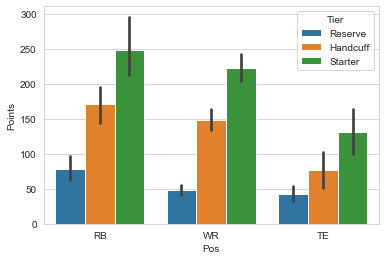

In [148]:
sns.barplot(x='Pos',y='Points', data=test, hue='Tier')

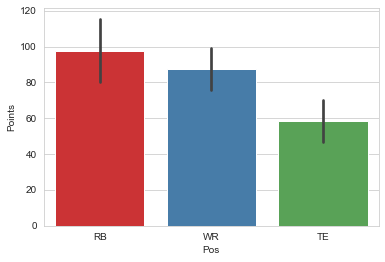

In [169]:
sns.barplot(x='Pos',y='Points', data=test, palette='Set1')

In [150]:
test['PPT'] = test['Points']/test['Touch']

In [152]:
test['PPTG'] = test['Points']/test['Tgt']

In [176]:
test.head()

,Name,Pos,Team,Tier,Age,Games,GS,Tgt,Rec,Rec_Yards,...,RRTD,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank,PPG,PPG Rank
0,Christian McCaffrey,RB,Carolina,Starter,23,16,16,142,116,1005,...,19,1,1.0,471.2,29.5,1.169231,3.318310,125.0,29.45000,1.0
1,Ezekiel Elliott,RB,Dallas,Starter,24,16,16,71,54,420,...,14,3,9.0,311.7,19.5,0.878028,4.390141,90.0,19.48125,4.0
2,Nick Chubb,RB,Cleveland,Starter,24,16,16,49,36,278,...,8,3,30.0,255.2,16.0,0.764072,5.208163,66.0,15.95000,15.0
3,Derrick Henry,RB,Tennessee,Starter,25,15,15,24,18,206,...,18,5,13.0,294.6,19.6,0.917757,12.275000,95.0,18.41250,6.0
4,Michael Thomas,WR,New Orleans,Starter,26,16,15,185,149,1725,...,9,1,3.0,374.6,23.4,2.497333,2.024865,315.0,23.41250,2.0


In [159]:
test['Pos'].value_counts()

WR    197
RB    115
TE    100
Name: Pos, dtype: int64

In [160]:
test[test['Pos']=='RB'].describe()

,Age,Games,GS,Tgt,Rec,Rec_Yards,Y/R,RecTD,Rec1D,Lng,...,Y/Tch,YScm,RRTD,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank
count,115.000000,115.000000,115.00000,115.000000,115.000000,115.000000,109.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,24.956522,12.886957,4.66087,27.547826,21.156522,169.191304,7.744954,0.808696,7.582609,23.373913,...,5.079130,552.373913,3.739130,1.060870,282.796460,97.217699,7.206195,0.952356,inf,92.849558
std,2.699549,3.727012,5.43040,26.741860,21.404046,182.412387,2.352598,1.363018,8.884229,15.353987,...,1.626777,515.621367,4.269613,1.384671,177.912256,90.327593,5.980971,0.403721,NaN,54.901937
min,21.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,4.000000,0.000000,0.000000,1.000000,0.800000,0.100000,0.150000,0.750000,7.000000
25%,23.000000,11.000000,0.00000,7.000000,6.000000,42.000000,6.500000,0.000000,1.000000,13.000000,...,4.300000,155.500000,0.000000,0.000000,122.000000,28.000000,1.900000,0.717778,2.133333,52.000000
50%,24.000000,14.000000,2.00000,20.000000,14.000000,107.000000,7.700000,0.000000,5.000000,21.000000,...,5.000000,404.000000,2.000000,1.000000,283.000000,68.400000,5.800000,0.878028,3.318310,90.000000
75%,26.000000,16.000000,8.50000,43.000000,34.000000,252.000000,9.000000,1.000000,10.500000,31.000000,...,5.650000,846.000000,6.000000,2.000000,411.000000,147.900000,10.600000,1.140000,5.208163,121.000000
max,36.000000,16.000000,16.00000,142.000000,116.000000,1005.000000,13.500000,8.000000,58.000000,84.000000,...,13.500000,2392.000000,19.000000,7.000000,610.000000,471.200000,29.500000,2.550000,inf,327.000000


In [154]:
test['PPT'].describe()

count    483.000000
mean       2.328907
std        5.369380
min       -0.900000
25%        1.143077
50%        2.197222
75%        2.705507
max      116.100000
Name: PPT, dtype: float64

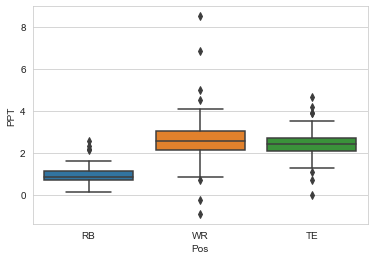

In [155]:
sns.boxplot(x='Pos',y='PPT',data=test)

In [156]:
test['PPT Rank'] = test['PPT'].rank()

In [175]:
test['PPG Rank'] = test['PPG'].rank(ascending=False)

In [157]:
test['PPT Rank']

0      125.0
1       90.0
2       66.0
3       95.0
4      315.0
       ...  
516    483.0
517      1.0
518    117.0
519      NaN
520      NaN
Name: PPT Rank, Length: 521, dtype: float64

In [158]:
test.loc[517]

Name         Darrius Shepherd
Pos                        WR
Team                Green Bay
Tier                      NaN
Age                        24
Games                       6
GS                          0
Tgt                         2
Rec                         1
Rec_Yards                   1
Y/R                         1
RecTD                       0
Rec1D                       0
Lng                         1
R/G                       0.2
Rec_Y/G                   0.2
Ctch%                   50.0%
Y/Tgt                     0.5
Rush                      NaN
Rush_Yds                  NaN
Rush_TD                   NaN
Rush_1D                     0
Rush_Lng                  NaN
Y/A                       NaN
Y/G                       NaN
A/G                       NaN
Touch                       1
Y/Tch                       1
YScm                        1
RRTD                        0
Fmb_AV                      1
Rank                      799
Points                   -0.9
Avg       

In [165]:
test.loc[(test.Pos == 'RB') & (test.PPT>1.5)]

,Name,Pos,Team,Tier,Age,Games,GS,Tgt,Rec,Rec_Yards,...,Y/Tch,YScm,RRTD,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank
199,Dare Ogunbowale,RB,Tampa Bay,Reserve,25,16,0,46,35,286,...,6.6,303,2,2,273.0,75.3,4.7,1.636957,1.636957,180.0
222,Kyle Juszczyk,RB,San Francisco,Handcuff,28,12,12,24,20,239,...,10.7,246,1,0,329.0,50.6,4.2,2.200000,2.108333,245.0
264,Brandon Bolden,RB,New England,Reserve,29,15,2,11,9,111,...,7.5,179,4,0,327.0,50.9,3.4,2.120833,4.627273,233.0
293,Dontrell Hilliard,RB,Cleveland,Reserve,24,14,0,15,12,92,...,5.6,141,2,2,366.0,38.1,2.7,1.524000,2.540000,168.0
323,DErnest Johnson,RB,Cleveland,Reserve,23,16,0,7,6,71,...,9.2,92,0,0,466.0,15.2,1.0,1.520000,2.171429,167.0
348,Devontae Booker,RB,Las Vegas,Reserve,27,16,0,9,6,57,...,8.3,66,0,0,482.0,12.6,0.8,1.575000,1.400000,174.0
367,Khari Blasingame,RB,Tennessee,Reserve,23,6,3,5,4,54,...,13.5,54,0,0,499.0,9.4,1.6,2.350000,1.880000,277.0
372,Kenjon Barner,RB,Baltimore,Reserve,29,14,0,8,6,22,...,5.0,50,0,4,467.0,15.1,1.1,1.510000,1.887500,166.0
387,Andy Janovich,RB,Cleveland,Reserve,26,7,3,5,5,42,...,7.2,43,1,0,465.0,15.3,1.9,2.550000,3.060000,327.0


In [166]:
test.loc[(test.Pos == 'WR') & (test.PPT>4)]

,Name,Pos,Team,Tier,Age,Games,GS,Tgt,Rec,Rec_Yards,...,Y/Tch,YScm,RRTD,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank
216,Marvin Hall,WR,Detroit,Reserve,26,9,0,11,7,261,...,33.5,268,1,0,360.0,39.8,4.4,4.975000,3.618182,476.0
282,DeSean Jackson,WR,Philadelphia,Reserve,33,3,3,10,9,159,...,17.7,159,2,0,372.0,36.9,12.3,4.100000,3.690000,470.0
302,Dan Arnold,WR,Arizona,Reserve,24,5,1,14,8,127,...,15.9,127,2,0,391.0,32.7,5.5,4.087500,2.335714,469.0
308,Olamide Zaccheaus,WR,Atlanta,Reserve,22,10,0,5,3,115,...,38.3,115,1,0,436.0,20.5,2.1,6.833333,4.100000,477.0
343,Chad Beebe,WR,Minnesota,Reserve,25,3,0,2,2,70,...,35.0,70,0,3,504.0,9.0,3.0,4.500000,4.500000,473.0
452,Ventell Bryant,WR,Dallas,Reserve,23,12,0,1,1,15,...,15.0,15,1,0,509.0,8.5,0.7,8.500000,8.500000,479.0


In [177]:
test.loc[(test.Pos == 'TE') & (test.PPT>3.5)]

,Name,Pos,Team,Tier,Age,Games,GS,Tgt,Rec,Rec_Yards,...,RRTD,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank,PPG,PPG Rank
91,Jared Cook,TE,New Orleans,Reserve,32,14,7,65,43,705,...,9,0,100.0,167.5,12.0,3.895349,2.576923,462.0,10.46875,67.0
230,Ricky SealsJones,TE,Kansas City,Reserve,24,14,3,22,14,229,...,4,1,313.0,58.9,4.2,4.207143,2.677273,471.0,3.68125,210.0
310,Ryan Izzo,TE,New England,Reserve,24,6,4,9,6,114,...,1,0,426.0,23.4,3.9,3.900000,2.600000,463.0,1.46250,308.0
458,Cethan Carter,TE,Cincinnati,Reserve,24,15,0,3,2,13,...,1,0,502.0,9.3,0.6,4.650000,3.100000,474.0,0.58125,374.0


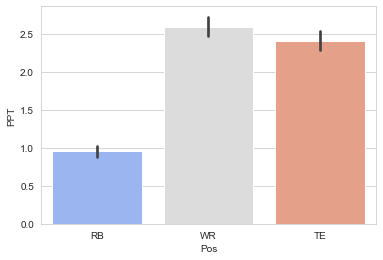

In [170]:
sns.barplot(x='Pos',y='PPT', data=test, palette='coolwarm')

In [171]:
test['PPG'] = test['Points']/16

In [180]:
ranks19 = test.sort_values(by=['PPG Rank','Rank'])
ranks19 = ranks19.reset_index(drop=True)

In [181]:
ranks19.head()

,Name,Pos,Team,Tier,Age,Games,GS,Tgt,Rec,Rec_Yards,...,RRTD,Fmb_AV,Rank,Points,Avg,PPT,PPTG,PPT Rank,PPG,PPG Rank
0,Christian McCaffrey,RB,Carolina,Starter,23,16,16,142,116,1005,...,19,1,1.0,471.2,29.5,1.169231,3.318310,125.0,29.45000,1.0
1,Michael Thomas,WR,New Orleans,Starter,26,16,15,185,149,1725,...,9,1,3.0,374.6,23.4,2.497333,2.024865,315.0,23.41250,2.0
2,Aaron Jones,RB,Green Bay,Starter,25,16,16,68,49,474,...,19,3,8.0,314.8,19.7,1.104561,4.629412,119.0,19.67500,3.0
3,Ezekiel Elliott,RB,Dallas,Starter,24,16,16,71,54,420,...,14,3,9.0,311.7,19.5,0.878028,4.390141,90.0,19.48125,4.0
4,Austin Ekeler,RB,LA Chargers,Reserve,24,16,8,108,92,993,...,11,3,10.0,309.0,19.3,1.379464,2.861111,149.0,19.31250,5.0


In [190]:
test['Team'].isnull().sum()

108